# Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

import vector_tiler as vt

In [2]:
import json

with open("my_docs/db_config.json") as json_data_file:
    configs = json.load(json_data_file)

In [13]:
configs["DATABASE"]

{'user': 'postgres',
 'password': 'hJNlLrSe7mAzMSPOwjuY',
 'host': 'qs-dienste.dpaorinp.de',
 'port': '5433',
 'database': 'fachdaten'}

# Demonstrate tiling functionality for given zoom level on toy example

Geom has following srid:  25832
Geom will be reprojected to:  0  for each tile requested
grid_intersections: [-1000.  -500.     0.   500.  1000.]
relevant grid intervals: {'x': [2, 2], 'y': [1, 2]}
corresponding axes values: {'x': [0.0, 500.0], 'y': [500.0, -500.0]}


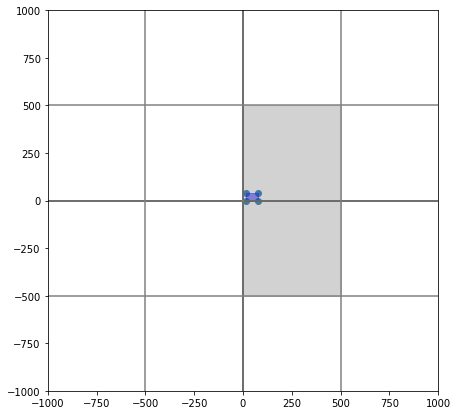

In [3]:
# create tiler object with TMS based on cartesian coordinates, ranging from -1000 to 1000
config_file = "my_docs/db_config.json"
pbf_srid = 0
crs_max = 1000
tiler = vt.VectorTiler(config_file, crs_max, pbf_srid)

# override bbox attribute (normally derived from target geom) with a toy example
tiler.bbox = {"xmin": 14.9, "xmax": 77.3, "ymin": -3.2, "ymax": 40.3} 

# For a given zoom level, visualize tiling results
zoom_level = 2
tiler.check_tiling(zoom_level)

# Create example vector tile cache in WebMercatorQuad

In [30]:
# input parameters
tileset_name = "Verwaltungseinheiten"
tileset_path = "C:/_Lokale_Daten_ungesichert/vt_caches"
config_file = "my_docs/db_config.json"
pbf_srid = 3857
crs_max = 20037508.3427892 #value taken from: https://github.com/pramsey/minimal-mvt/blob/master/minimal-mvt.py

In [31]:
# instantiate tiler object
vtiler = vt.VectorTiler(config_file, crs_max, pbf_srid)

Geom has following srid:  25832
Geom will be reprojected to:  3857  for each tile requested


In [32]:
vtiler.generate_tileset(tileset_path, tileset_name, zoomlevel_range=(0,8))

Generating tiles for zoom level 0


  0%|          | 0/1 [00:00<?, ?it/s]


UndefinedFunction: FEHLER:  Funktion st_asmvtgeom(geometry, box2d) existiert nicht
LINE 12:                 SELECT ST_AsMVTGeom(ST_Transform(t.geom, 385...
                                ^
HINT:  Keine Funktion stimmt mit dem angegebenen Namen und den Argumenttypen überein. Sie müssen möglicherweise ausdrückliche Typumwandlungen hinzufügen.


# Further testing scenarios for bounding boxes
Outdated snippet. Kept this as reminder for structuring testing scenarios,
because I encountered some tiling bugs when bbox coordinates exactly intersect with grid lines of a given zoom level.
So far, they are resolved, and in case similar bugs reappear, those scenarios can be used for debugging.

In [7]:
# test different bboxes of target geoms: bottom left, bottom right, top right, top left
test_bboxes = [
    [(4.5,-4.5), (7, -4.5), (7,4.5), (4.5,4.5)], #all values BETWEEN cutpoints of zoom level 2
    [(5,-4.5), (7, -4.5), (7,4.5), (5,4.5)], #X values ON cutpoints of zoom level 2
    [(4.5,-5), (7, -5), (7, 0), (4.5, 0)], #Y values ON cutpoints of zoom level 2
    [(-10,-4.5), (10, -4.5), (10,4.5), (-10,4.5)], #X values span MIN and MAX cutpoints of zoom level 2    
    [(4.5,-10), (7, -10), (7,10), (4.5,10)] #Y values span MIN and MAX cutpoints of zoom level 2
]